<a href="https://colab.research.google.com/github/MeRinUa/Colab/blob/main/__13______ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ніконенко Назарій Андрійович ФІТ 2-8

Варіант 16

Лабораторна робота 13.

Тема: Звичайні диференційні рівняння. Задача Коші

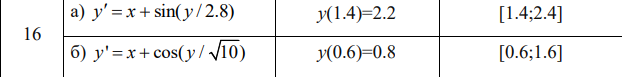

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

In [ ]:
https://github.com/MeRinUa/Work_14.git

SyntaxError: invalid syntax (ipython-input-1425321330.py, line 1)

# ВХІДНІ ДАНІ (пункт а)

In [ ]:
def f(x, y):
    return x + np.sin(y / 2.8)
a, b, h, y0 = 1.4, 2.4, 0.1, 2.2



n = int(round((b - a) / h))
x_mesh = np.linspace(a, b, n + 1)

print(f"Розв'язуємо рівняння на відрізку [{a}; {b}] з кроком {h}")
print(f"Кількість кроків: {n}")

Розв'язуємо рівняння на відрізку [1.4; 2.4] з кроком 0.1
Кількість кроків: 10


# ВХІДНІ ДАНІ (пункт б)

In [ ]:
def f(x, y):
    return x + np.cos(y / np.sqrt(10))
a, b, h, y0 = 0.6, 1.6, 0.1, 0.8

n = int(round((b - a) / h))
x_mesh = np.linspace(a, b, n + 1)

print(f"Розв'язуємо рівняння на відрізку [{a}; {b}] з кроком {h}")
print(f"Кількість кроків: {n}")

Розв'язуємо рівняння на відрізку [0.6; 1.6] з кроком 0.1
Кількість кроків: 10


# 1. МЕТОД ЕЙЛЕРА

Метод Ейлера (результати):
[2.2    2.4107 2.6366 2.8774 3.133  3.403  3.6868 3.9835 4.2924 4.6124
 4.9421]


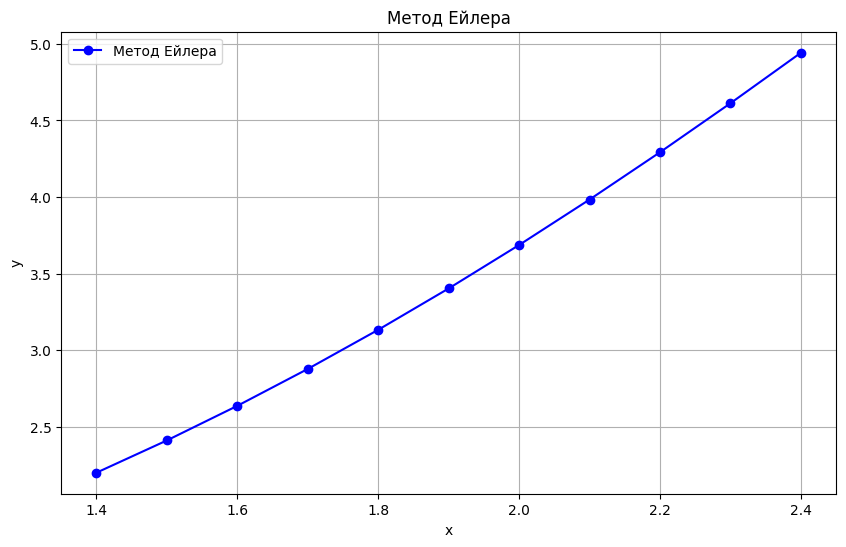

In [ ]:
y_euler = np.zeros(n + 1)
y_euler[0] = y0

for i in range(n):
    # Формула: y_{i+1} = y_i + h * f(x_i, y_i)
    y_euler[i + 1] = y_euler[i] + h * f(x_mesh[i], y_euler[i])

print("Метод Ейлера (результати):")
print(np.round(y_euler, 4))

plt.figure(figsize=(10, 6))
plt.plot(x_mesh, y_euler, 'o-', label='Метод Ейлера', color='blue')
plt.title("Метод Ейлера")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

# 2. МЕТОД ЕЙЛЕРА-КОШІ


Метод Ейлера-Коші (результати):
[2.2    2.4183 2.6518 2.9003 3.1635 3.4408 3.7315 4.0346 4.3492 4.6739
 5.0075]


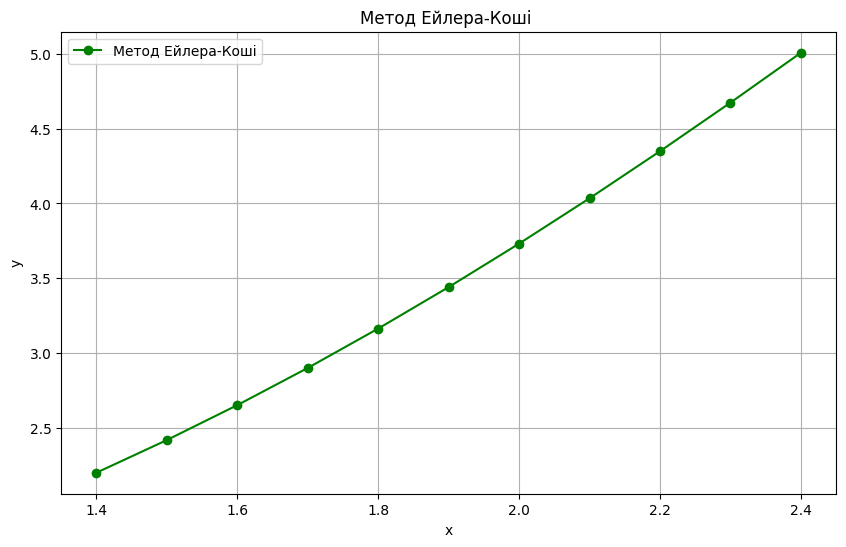

In [ ]:
y_cauchy = np.zeros(n + 1)
y_cauchy[0] = y0

for i in range(n):
    # Попереднє обчислення (предиктор)
    y_pred = y_cauchy[i] + h * f(x_mesh[i], y_cauchy[i])
    # Уточнення (коректор)
    # y_{i+1} = y_i + (h/2) * [f(x_i, y_i) + f(x_{i+1}, y_pred)]
    f_curr = f(x_mesh[i], y_cauchy[i])
    f_next = f(x_mesh[i+1], y_pred)
    y_cauchy[i + 1] = y_cauchy[i] + (h / 2) * (f_curr + f_next)

print("\nМетод Ейлера-Коші (результати):")
print(np.round(y_cauchy, 4))

plt.figure(figsize=(10, 6))
plt.plot(x_mesh, y_cauchy, 'o-', label='Метод Ейлера-Коші', color='green')
plt.title("Метод Ейлера-Коші ")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

# 3. ПЕРЕВІРКА SCIPY.INTEGRATE.ODEINT


Перевірка odeint:
[0.8    0.9611 1.1307 1.3084 1.4937 1.6863 1.8858 2.0917 2.3035 2.5208
 2.7431]


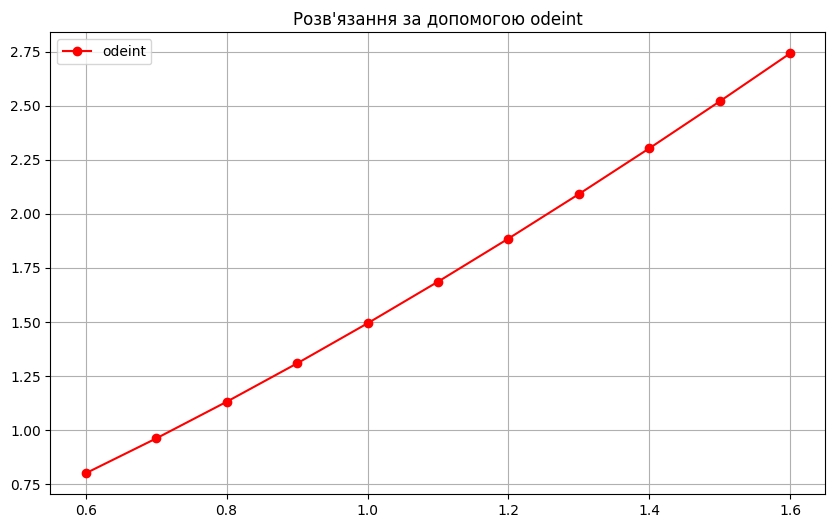

In [ ]:
def model_odeint(y, x):
    return f(x, y) # odeint вимагає порядок (y, x) або (y, t)

y_odeint = odeint(model_odeint, y0, x_mesh)
y_odeint_flat = y_odeint.flatten()

print("\nПеревірка odeint:")
print(np.round(y_odeint_flat, 4))

plt.figure(figsize=(10, 6))
plt.plot(x_mesh, y_odeint_flat, 'o-', label='odeint', color='red')
plt.title("Розв'язання за допомогою odeint")
plt.grid(True)
plt.legend()
plt.show()

# 4. ПЕРЕВІРКА SCIPY.INTEGRATE.SOLVE_IVP


Перевірка solve_ivp:
[0.8    0.9611 1.1307 1.3084 1.4937 1.6863 1.8858 2.0916 2.3034 2.5207
 2.7431]


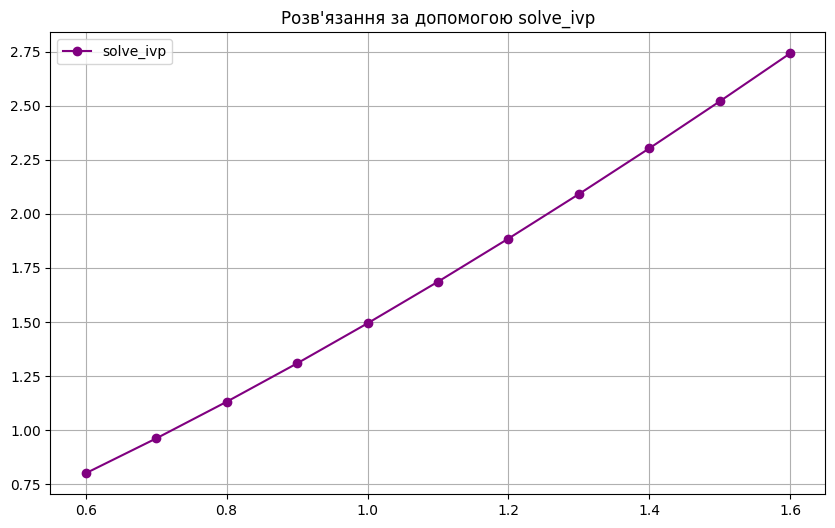

In [ ]:
sol = solve_ivp(f, [a, b], [y0], t_eval=x_mesh)

print("\nПеревірка solve_ivp:")
print(np.round(sol.y[0], 4))

plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], 'o-', label='solve_ivp', color='purple')
plt.title("Розв'язання за допомогою solve_ivp")
plt.grid(True)
plt.legend()
plt.show()